In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Finding new Rfam families only

In [10]:
%autoreload
from rna2d.utils import Rfam

rfam142 = "../external-files/rfam-14.2/Rfam.pdb"
rfam148 = "../external-files/rfam-14.8/Rfam.pdb"

rfam = Rfam()
rfam2_mapping = rfam.get_pdb_family_mapping(rfam142)
rfam8_mapping = rfam.get_pdb_family_mapping(rfam148)
print(len(rfam2_mapping), len(rfam8_mapping))

5736 7659


In [11]:
%autoreload
rfam2_ids = set(rfam.get_families_ids(rfam142))
rfam8_ids = set(rfam.get_families_ids(rfam148))

a = rfam2_ids.difference(rfam8_ids)
b = rfam8_ids.difference(rfam2_ids)
i = rfam2_ids.intersection(rfam8_ids)

print(len(rfam2_ids), len(rfam8_ids))
print(f'2vs8: {len(a)}, 8vs2:{len(b)}, intersection:{len(i)}')
print(b)

rfam8_fams = rfam.get_pdb_family_mapping(rfam148, b)
print(len(rfam8_fams))


108 125
2vs8: 5, 8vs2:22, intersection:103
{'RF01415', 'RF02681', 'RF00240', 'RF01047', 'RF01084', 'RF00507', 'RF02340', 'RF00619', 'RF00106', 'RF00007', 'RF00012', 'RF00030', 'RF04190', 'RF03054', 'RF00024', 'RF01330', 'RF01357', 'RF00957', 'RF03013', 'RF02678', 'RF00075', 'RF00525'}
83


In [12]:
print(rfam8_fams)

{'7DVQ_H': 'RF00007', '7MQ8_L2': 'RF00012', '7MQ9_L2': 'RF00012', '7MQA_L2': 'RF00012', '7QXA_B': 'RF00024', '7V9A_R': 'RF00024', '7TRD_B': 'RF00024', '7BG9_B': 'RF00024', '7TRE_B': 'RF00024', '7V99_R': 'RF00024', '7TRF_B': 'RF00024', '7TRC_B': 'RF00024', '7BGB_B': 'RF00024', '7QXS_B': 'RF00024', '7QXB_B': 'RF00024', '7DA7_C': 'RF00030', '7C7A_A': 'RF00030', '7DAS_C': 'RF00030', '6W6V_A': 'RF00030', '7C79_A': 'RF00030', '7ELD_B': 'RF00075', '7NPN_AA': 'RF00106', '7AS5_AA': 'RF00240', '7O80_AH': 'RF00507', '6XRZ_A': 'RF00507', '7O7Z_AH': 'RF00507', '7O7Y_AH': 'RF00507', '7O81_AH': 'RF00507', '7KGA_B': 'RF00525', '7KGA_A': 'RF00525', '7DVQ_F': 'RF00619', '7MQ9_L0': 'RF00957', '7MQ8_L0': 'RF00957', '7MQA_L0': 'RF00957', '6VAR_A': 'RF01047', '7SAM_A': 'RF01084', '7SCQ_C': 'RF01084', '7SC6_C': 'RF01084', '7MIB_J': 'RF01330', '7MI9_G': 'RF01330', '7MIB_H': 'RF01330', '7MI9_H': 'RF01330', '4C9D_C': 'RF01357', '4C9D_D': 'RF01357', '4PQV_A': 'RF01415', '7LYF_A': 'RF02340', '7LYG_A': 'RF02340', 

In [13]:
print(sorted(list(rfam2_mapping.keys()))[:10])
print(sorted(list(rfam8_mapping.keys()))[:10])

['1ASY_R', '1ASY_S', '1ASZ_R', '1ASZ_S', '1B23_R', '1C04_E', '1C0A_B', '1C2W_B', '1C2X_C', '1EFW_C']
['1ASY_R', '1ASY_S', '1ASZ_R', '1ASZ_S', '1B23_R', '1C04_E', '1C0A_B', '1C2W_B', '1C2X_C', '1EFW_C']


In [14]:
new_mapping = rfam.get_new_keys_only(rfam2_mapping, rfam8_mapping)
print(len(new_mapping))
print(sorted(list(new_mapping.keys()))[:10])

1977
['1M5K_B', '1M5K_E', '1M5O_B', '1M5O_E', '1M5P_B', '1M5P_E', '1M5V_B', '1M5V_E', '3IZZ_D', '4C9D_C']


### Remove SPOT-RNA training examples

In [15]:
%autoreload 2
import os
from rna2d.utils import get_pdb_ids

train_pdbs = "../external-files/PDB_dataset/TR1_sequences/"
homologs_pdbs = "../metadata/homologs_to_remove.txt"
trpdbs = get_pdb_ids(train_pdbs)
homologs = get_pdb_ids(homologs_pdbs)

nm = set(new_mapping.keys())
tp = set(trpdbs)
diff = nm.intersection(tp)
print(f'Common: {len(diff)}')

new_mapping = rfam.filter_out_list(trpdbs, new_mapping)
rfam_novel = rfam.filter_out_list(trpdbs, rfam8_fams)
print(len(new_mapping))
print(len(rfam_novel))
print(sorted(trpdbs)[:5])
print(sorted(homologs)[:5])

Common: 1
1976
82
['1C0A_B', '1DDY_A', '1DK1_B', '1DUL_B', '1FFK_9']
['4V9I_AY', '4V9I_CY', '6LKQ_u', '6LQM_5', '6LSR_5']


List of missing cif files

In [16]:
new_cifs = os.listdir('/data/2d-rna/new-cifs/cifs')
cifs_ids = [x.replace('.cif', '') for x in new_cifs]
cifs_ids = [f'{p.split("_")[0]}_{p.split("_")[2]}' for p in cifs_ids]
out = []
out_ids = []
novel_out = []
novel_ids = []
for a, b in zip(cifs_ids, new_cifs):
    if a in new_mapping:
        out.append(b)
        out_ids.append(a)
    if a in rfam_novel:
        novel_out.append(b)
        novel_ids.append(a)

for m in rfam_novel:
    if m not in cifs_ids:
        print(m)

print(len(out))
print(out[:10])
print(out_ids[:10])
print(len(novel_out))
print(novel_out[:10])
print(novel_ids[:10])

7DVQ_H
7NPN_AA
7AS5_AA
7O80_AH
7O7Y_AH
7O81_AH
7DVQ_F
7MIB_J
7MI9_G
7MIB_H
7MI9_H
6JQ5_B
6JQ5_A
1755
['6OM6_1_5.cif', '6WDJ_1_7.cif', '6WDK_1_7.cif', '7N2U_1_Dt.cif', '7N30_1_Dt.cif', '6Y3G_1_F.cif', '6Y4B_1_F.cif', '6ZTP_1_AX.cif', '6WD5_1_7.cif', '6ZTL_1_AX.cif']
['6OM6_5', '6WDJ_7', '6WDK_7', '7N2U_Dt', '7N30_Dt', '6Y3G_F', '6Y4B_F', '6ZTP_AX', '6WD5_7', '6ZTL_AX']
69
['7SC6_1_C.cif', '7SCQ_1_C.cif', '6VAR_6_A.cif', '5T5A_1_A.cif', '7MQA_1_L0.cif', '7O7Z_1_AH.cif', '7BG9_1_B.cif', '7QXA_1_B.cif', '7QXB_1_B.cif', '7QXS_1_B.cif']
['7SC6_C', '7SCQ_C', '6VAR_A', '5T5A_A', '7MQA_L0', '7O7Z_AH', '7BG9_B', '7QXA_B', '7QXB_B', '7QXS_B']


In [17]:
fams = [new_mapping[p] for p in new_mapping]

### New sequnces analysis (Rfam 14.8 \ 14.2)

11


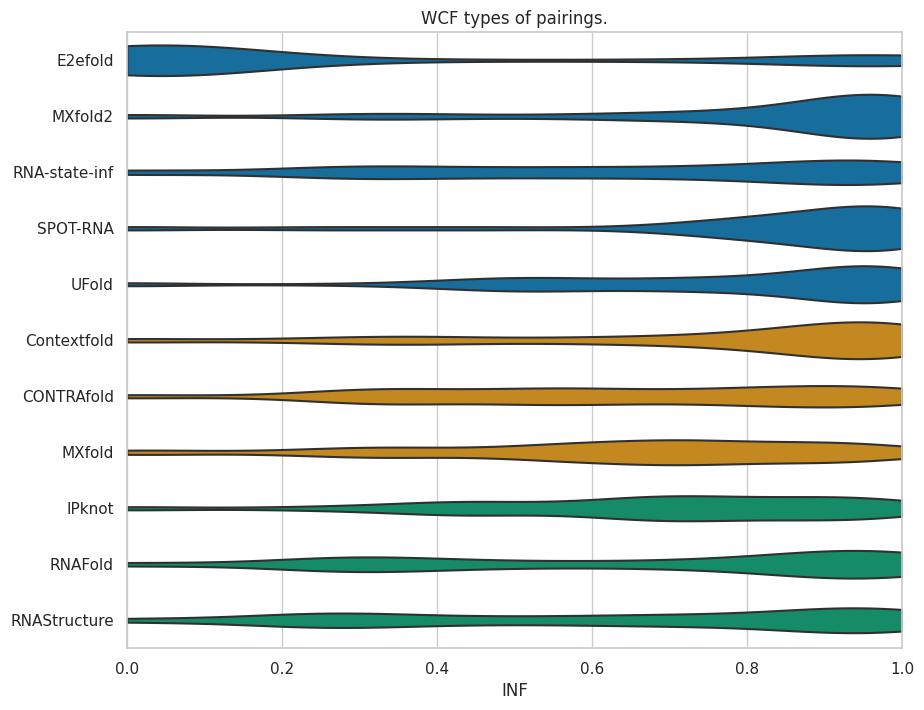

In [28]:
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
from rna2d.pipelines import Results
from rna2d.visualization import Violinplot, SeabornData, get_type_colors
from rna2d.pipelines import RfamNew

colors = get_type_colors()


RFAM142 = "../external-files/rfam-14.2/Rfam.pdb"
RFAM148 = "../external-files/rfam-14.8/Rfam.pdb"
RES_ALL = "/data/2d-rna/new-cifs/validation-all/results.rpt"
RES_WC = "/data/2d-rna/new-cifs/validation-canon/results.rpt"
RES_NWC = "/data/2d-rna/new-cifs/validation-noncanon/results.rpt"
RES_PK = "/data/2d-rna/new-cifs/validation-pseudoknots/results.rpt"
RES_ST = "/data/2d-rna/new-cifs/validation-stack/results.rpt"

ignored_methods = ['spot-rna2', 'rnaalifold', 'rscape', 'turbofold']
rfam_all = RfamNew(RES_ALL, RFAM142, RFAM148, ignored_methods=ignored_methods)
rfam_wc = RfamNew(RES_WC, RFAM142, RFAM148, ignored_methods=ignored_methods)
rfam_nwc = RfamNew(RES_NWC, RFAM142, RFAM148, ignored_methods=ignored_methods)
rfam_pk = RfamNew(RES_PK, RFAM142, RFAM148, ignored_methods=ignored_methods)
rfam_st = RfamNew(RES_ST, RFAM142, RFAM148, ignored_methods=ignored_methods)

filter = []
filter.extend(trpdbs)
filter.extend(homologs)

res_all, ind_all = rfam_all.get_newest_only(filter = filter)
res_wc, ind_wc = rfam_wc.get_newest_only(filter = filter)
res_nwc, ind_nwc = rfam_nwc.get_newest_only(filter = filter)
res_pk, ind_pk = rfam_pk.get_newest_only(filter = filter)
res_st, ind_st = rfam_st.get_newest_only(filter = filter)

order = [
    'e2efold',
    'mxfold2',
    'rna-state-inf',
    'spot-rna',
    'ufold',
    'contextFold',
    'contrafold',
    'mxfold',
    'ipknot',
    'rnafold',
    'rna-structure'
    ]

v = Violinplot()
# sall = SeabornData(res_all, ind_all)
swc = SeabornData(res_wc, ind_wc)
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
# sns_all = sall.get_sns_format_data(order=order, colors_dict=colors)
sns_wc = swc.get_sns_format_data(order=order, colors_dict=colors)
# v.plot(sns_all, axs[0], "A", "All types of pairings.", x_axis=True)
v.plot(sns_wc, axs, "", "WCF types of pairings.", x_axis=True)
fig.savefig("Figure2.eps", format='eps')

In [33]:
with open("../data/test-set-2-ids-all.txt", "w") as f:
    for pdbid in res_all['spot-rna'].index:
        f.write(f'{pdbid}\n')

In [19]:
snwc = SeabornData(res_pk, ind_pk)
sns_nwc = snwc.get_sns_format_data(order=order, colors_dict=colors)
sns_nwc.dropna().groupby('Method').count()

,INF,Means,Color
Method,,,
CONTRAfold,107,107,107
Contextfold,107,107,107
E2efold,107,107,107
IPknot,107,107,107
MXfold,107,107,107
MXfold2,107,107,107
RNA-state-inf,107,107,107
RNAFold,107,107,107
RNAStructure,107,107,107


In [20]:
from rna2d.utils import get_means_stds, get_DataFrames

with open('../data/test-set-2-ids-all.txt', 'w') as f:
    f.writelines("\n".join(ind_all['spot-rna']))

noncanon_methods = ['spot-rna', 'ufold', 'e2efold']
pk_methods = ['spot-rna', 'e2efold', 'ipknot', 'ufold']

all_means, all_stds, all_dfs = get_means_stds(
    res_all, ind_all, names=True, out_path='../results/all-rfam')
all_dfmeans, all_dfstds = get_DataFrames(
    all_means, all_stds, out_path="../results/all-rfam", name='all')

wc_means, wc_stds, wc_dfs = get_means_stds(
    res_wc, ind_wc, names=True, out_path='../results/canon-rfam')
wc_dfmeans, wc_dfstds = get_DataFrames(
    wc_means, wc_stds, out_path="../results/canon-rfam", name='canon')

nwc_means, nwc_stds, nwc_dfs = get_means_stds(
    res_nwc, ind_nwc, names=True, out_path='../results/noncanon-rfam', selected_methods=noncanon_methods)
nwc_dfmeans, nwc_dfstds = get_DataFrames(
    nwc_means, nwc_stds, out_path="../results/noncanon-rfam", name='noncanon')

pk_means, pk_stds, pk_dfs = get_means_stds(
    res_pk, ind_pk, names=True, out_path='../results/pseudo-rfam', selected_methods=pk_methods)
pk_dfmeans, pk_dfstds = get_DataFrames(
    pk_means, pk_stds, out_path="../results/pseudo-rfam", name='pseudo')

st_means, st_stds, st_dfs = get_means_stds(
    res_st, ind_st, names=True, out_path='../results/stack-rfam')
st_dfmeans, st_dfstds = get_DataFrames(
    st_means, st_stds, out_path="../results/stack-rfam", name='stack')

### New Rfam Families analysis (Rfam 14.8 \ 14.2)

In [21]:
import numpy as np
import pandas as pd
from rna2d.pipelines import Results
from rna2d.utils import get_names

def get_updated_df(path, method = 'rnaalifold', colors_dict: dict = {}):
    results = Results(path, [])
    methods, indeces = results.run_for_all()
    df = pd.DataFrame(methods[method], 
                    columns=['PPV', 'TPR', 'F1', 'INF'],
                    index=indeces[method])
    infs = df['INF'].values
    m = np.full(len(infs), get_names()[method])
    means = np.full(len(infs), np.mean(infs))
    colors = np.full(len(infs), colors_dict.get(method, 0))
    sns_df = pd.DataFrame({"Method": m, "INF": infs, 'Means': means, 'Color': colors})
    return sns_df

MSA_ALL = "/data/2d-rna/validation-msa/results.rpt"
alifold_df = get_updated_df(MSA_ALL, method='rnaalifold', colors_dict=colors)
rscape_df = get_updated_df(MSA_ALL, method='rscape', colors_dict=colors)
turbo_df = get_updated_df(MSA_ALL, method='turbofold', colors_dict=colors)
spot2_df = get_updated_df(RES_WC, method='spot-rna2', colors_dict=colors)
spot2_nwc_df = get_updated_df(RES_NWC, method='spot-rna2', colors_dict=colors)
spot2_pk_df = get_updated_df(RES_PK, method='spot-rna2', colors_dict=colors)
spot2_st_df = get_updated_df(RES_ST, method='spot-rna2', colors_dict=colors)
print(turbo_df)
rearanged_order =  [
    'e2efold',
    'mxfold2',
    'rna-state-inf',
    'spot-rna',
    'spot-rna2',
    'ufold',
    'contextFold',
    'contrafold',
    'mxfold',
    'ipknot',
    'rnaalifold',
    'rnafold',
    'rna-structure'
    ]

rearanged_order = [get_names()[m] for m in rearanged_order]

          Method    INF     Means  Color
0   TurboFold II  0.782  0.580214      2
1   TurboFold II  0.587  0.580214      2
2   TurboFold II  0.905  0.580214      2
3   TurboFold II  0.401  0.580214      2
4   TurboFold II  0.865  0.580214      2
5   TurboFold II  0.737  0.580214      2
6   TurboFold II  0.959  0.580214      2
7   TurboFold II  0.973  0.580214      2
8   TurboFold II  1.000  0.580214      2
9   TurboFold II  0.000  0.580214      2
10  TurboFold II  0.000  0.580214      2
11  TurboFold II  0.000  0.580214      2
12  TurboFold II  0.467  0.580214      2
13  TurboFold II  0.447  0.580214      2


0 spot-rna
1 mxfold2
2 ufold
3 contextFold
4 ipknot
5 contrafold
6 rnafold
7 mxfold
8 rna-state-inf
9 rna-structure
10 e2efold
15


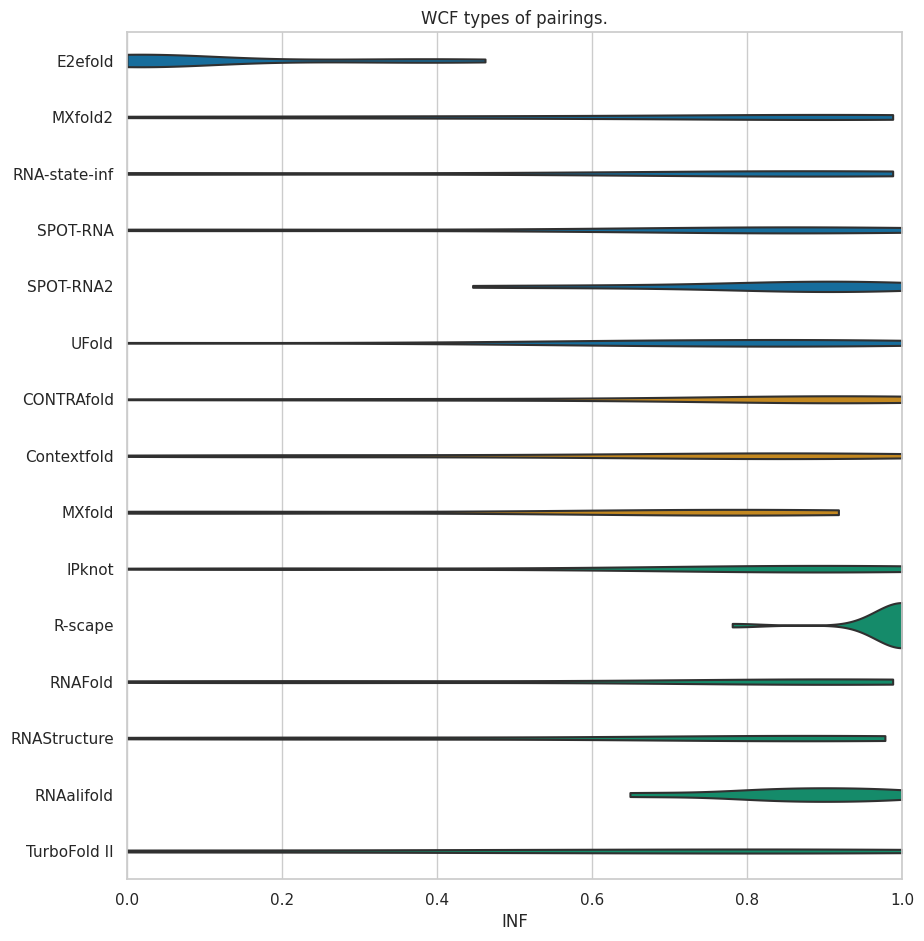

In [22]:
%autoreload 2
from rna2d.utils import get_single_representative


all_novel = {}
all_ind_novel = {}
wc_novel = {}
wc_ind_novel = {}
nwc_novel = {}
nwc_ind_novel = {}
pk_novel = {}
pk_ind_novel = {}
st_novel = {}
st_ind_novel = {}
keys = list(rfam_novel.keys())

ignored_methods = ['rnaalifold', 'spot-rna2', 'rscape', 'turbofold']
rfam_all = RfamNew(RES_ALL, RFAM142, RFAM148, ignored_methods=ignored_methods)
rfam_wc = RfamNew(RES_WC, RFAM142, RFAM148, ignored_methods=ignored_methods)
rfam_nwc = RfamNew(RES_NWC, RFAM142, RFAM148, ignored_methods=ignored_methods)
rfam_pk = RfamNew(RES_PK, RFAM142, RFAM148, ignored_methods=ignored_methods)
rfam_st = RfamNew(RES_ST, RFAM142, RFAM148, ignored_methods=ignored_methods)

res_all, ind_all = rfam_all.get_newest_only(filter = trpdbs)
res_wc, ind_wc = rfam_wc.get_newest_only(filter = trpdbs)
res_nwc, ind_nwc = rfam_nwc.get_newest_only(filter = trpdbs)
res_pk, ind_pk = rfam_pk.get_newest_only(filter = trpdbs)
res_st, ind_st = rfam_st.get_newest_only(filter = trpdbs)


order = [
    'e2efold',
    'mxfold2',
    'rna-state-inf',
    'spot-rna',
    'ufold',
    'contextFold',
    'contrafold',
    'mxfold',
    'ipknot',
    'rnafold',
    'rna-structure'
    ]

single_rep = get_single_representative(
    all_indeces = res_all['spot-rna'].index.tolist(),
    pk_indeces = res_pk['spot-rna'].index.tolist(),
    novel_keys = keys,
    mapping = rfam8_mapping,
    seed=100
    )


keys_all = [k for k in single_rep if k in res_all['spot-rna'].index]
keys_wc = [k for k in single_rep if k in res_wc['spot-rna'].index]
keys_nwc = [k for k in single_rep if k in res_nwc['spot-rna'].index]
keys_pk = [k for k in single_rep if k in res_pk['spot-rna'].index]
keys_st = [k for k in single_rep if k in res_st['spot-rna'].index]


for i, n in enumerate(res_all):
    print(i, n)
    all_novel[n] = res_all[n].loc[keys_all]
    all_ind_novel[n] = keys_all
    wc_novel[n] = res_wc[n].loc[keys_wc]
    wc_ind_novel[n] = keys_wc
    nwc_novel[n] = res_nwc[n].loc[keys_nwc]
    nwc_ind_novel[n] = keys_nwc
    pk_novel[n] = res_pk[n].loc[keys_pk]
    pk_ind_novel[n] = keys_pk
    st_novel[n] = res_st[n].loc[keys_st]
    st_ind_novel[n] = keys_st

# o = [
#     'e2efold',
#     'mxfold2',
#     'rna-state-inf',
#     'spot-rna',
#     "spot-rna2",
#     'ufold',
#     'contextFold',
#     'contrafold',
#     'mxfold',
#     'ipknot',
#     "rscape",
#     "rnaalifold",
#     'rnafold',
#     'rna-structure'
#     ]
# names = [get_names()[m] for m in o]
v = Violinplot()
# sall = SeabornData(all_novel, ind_all)
swc = SeabornData(wc_novel, wc_ind_novel)
# generate a single plot. Create a figure and get axis
fig, axs = plt.subplots(1, 1, figsize=(10, 11))

# sns_all = sall.get_sns_format_data(order=order, colors_dict=colors)
sns_wc = swc.get_sns_format_data(order=order, colors_dict=colors)
sns_wc = pd.concat([sns_wc, alifold_df, spot2_df, rscape_df, turbo_df], axis=0)

# sort dataframe by two columns.
sns_wc = sns_wc.sort_values(by=['Color', "Method"], ascending=[True, True])

v.plot(sns_wc, axs, "", "WCF types of pairings.", x_axis=True)
fig.savefig("Figure3.eps", format='eps')

In [23]:
print(sns_wc.groupby('Method').count())
print(rscape_df.groupby('Method').count())
print(alifold_df.groupby('Method').count())
print("Turbofold")
print(turbo_df.groupby('Method').count())
print(turbo_df.groupby('Method').mean())
print(turbo_df.groupby('Method').std())

               INF  Means  Color
Method                          
CONTRAfold      16     16     16
Contextfold     16     16     16
E2efold         16     16     16
IPknot          16     16     16
MXfold          16     16     16
MXfold2         16     16     16
R-scape         14     14     14
RNA-state-inf   16     16     16
RNAFold         16     16     16
RNAStructure    16     16     16
RNAalifold      14     14     14
SPOT-RNA        16     16     16
SPOT-RNA2       13     13     13
TurboFold II    14     14     14
UFold           16     16     16
         INF  Means  Color
Method                    
R-scape   14     14     14
            INF  Means  Color
Method                       
RNAalifold   14     14     14
Turbofold
              INF  Means  Color
Method                         
TurboFold II   14     14     14
                   INF     Means  Color
Method                                 
TurboFold II  0.580214  0.580214    2.0
                   INF  Means  Color
Metho

In [24]:
from rna2d.utils import get_means_stds, get_DataFrames
with open('../data/test-set-3-ids-all.txt', 'w') as f:
    f.writelines("\n".join(keys_all))

with open('../data/test-set-3-ids-fams.txt', 'w') as f:
    for k in keys_all:
        f.write(f"{k} {rfam8_mapping[k]}\n")

noncanon_methods = ['spot-rna', 'spot-rna2', 'ufold', 'e2efold']
pk_methods = ['spot-rna', 'spot-rna2', 'e2efold', 'ipknot', 'ufold']
# Novel

all_means, all_stds, all_dfs = get_means_stds(
    all_novel, all_ind_novel, names=True, out_path='../results/all-novel')
all_dfmeans, all_dfstds = get_DataFrames(
    all_means, all_stds, out_path="../results/all-novel", name='all')

wc_means, wc_stds, wc_dfs = get_means_stds(
    wc_novel, wc_ind_novel, names=True, out_path='../results/canon-novel')
wc_dfmeans, wc_dfstds = get_DataFrames(
    wc_means, wc_stds, out_path="../results/canon-novel", name='canon')

nwc_means, nwc_stds, nwc_dfs = get_means_stds(
    nwc_novel, nwc_ind_novel, names=True, out_path='../results/noncanon-novel', selected_methods=noncanon_methods)
nwc_dfmeans, nwc_dfstds = get_DataFrames(
    nwc_means, nwc_stds, out_path="../results/noncanon-novel", name='noncanon')

pk_means, pk_stds, pk_dfs = get_means_stds(
    pk_novel, pk_ind_novel, names=True, out_path='../results/pseudo-novel', selected_methods=pk_methods)
pk_dfmeans, pk_dfstds = get_DataFrames(
    pk_means, pk_stds, out_path="../results/pseudo-novel", name='pseudo')

st_means, st_stds, st_dfs = get_means_stds(
    st_novel, st_ind_novel, names=True, out_path='../results/stack-novel')
st_dfmeans, st_dfstds = get_DataFrames(
    st_means, st_stds, out_path="../results/stack-novel", name='stack')


988


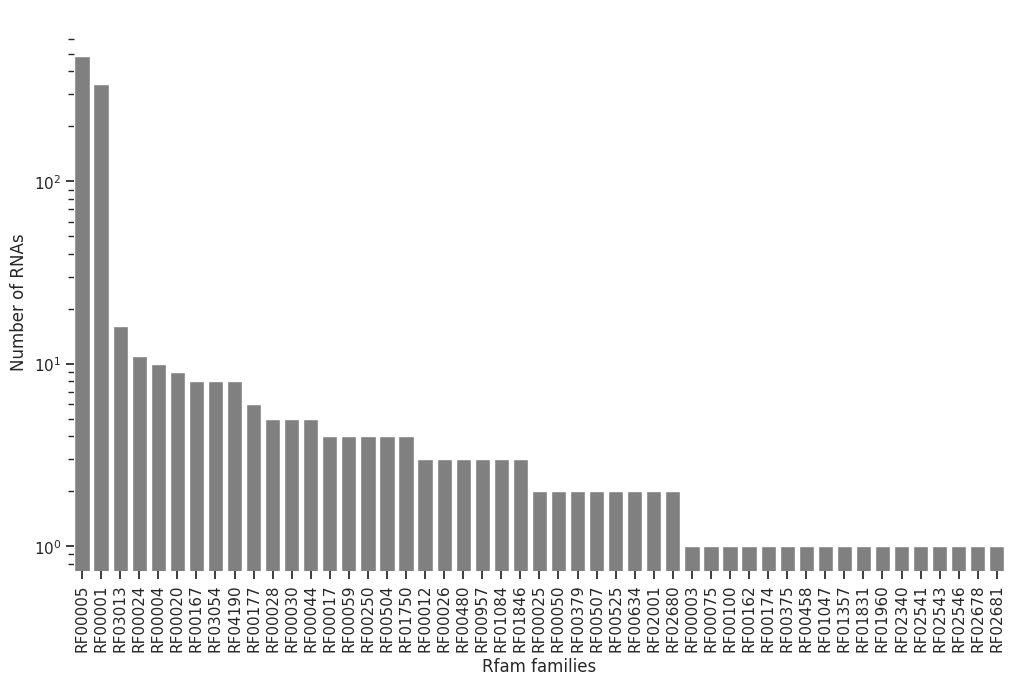

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

new_seq_ids = res_all['spot-rna'].index.tolist()
new_seq_ids = [new_mapping[p] for p in new_seq_ids]
print(len(new_seq_ids))
c = Counter(new_seq_ids)
vals = list(c.values())
keys = list(c.keys())

vk = sorted(zip(keys, vals), key=lambda x : (-x[1], x[0]), reverse=False)
rest = vk[2:]
skeys = [x[0] for x in vk]
svals = [x[1] for x in vk]
rkeys = [x[0] for x in rest]
rvals = [x[1] for x in rest]


def plot_representatives(keys, vals, title, scale = None, rotate=True, frame = False):
    fig, ax = plt.subplots(figsize=(12,7))
    ax.grid(True, 'both', zorder=0)
    ax.bar(keys, vals, color='gray', zorder=3, log=True)

    if rotate:
        _ = plt.xticks(rotation=90)
    plt.margins(x=0)
    
    # remove gridlines
    ax.grid(False)
    plt.grid(False, which="both")

    # make ticks visible on axes x and y
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')

    if title != "":
        plt.xlabel("Rfam families")
        plt.ylabel("Number of RNAs")
        plt.title(title)
        
    if scale is not None:
        plt.yticks(scale)
    if not frame:
        for pos in ['right', 'top', 'bottom', 'left']:
            plt.gca().spines[pos].set_visible(False)

plot_representatives(skeys, svals, title=" ",)
# plot_representatives(rkeys, rvals, title="", scale = range(0, max(rvals), 2), frame=True)

In [18]:
print(len(all_dfs['SPOT-RNA']))
print(len(wc_dfs['SPOT-RNA']))
print(len(nwc_dfs['SPOT-RNA']))
print(len(pk_dfs['SPOT-RNA']))

print(len(all_dfs['SPOT-RNA']))
print(len(wc_dfs['SPOT-RNA']))
print(len(nwc_dfs['SPOT-RNA']))
print(len(pk_dfs['SPOT-RNA']))

16
16
16
5
16
16
16
5


In [19]:
pk_dfmeans

,PPV,TPR,F1,INF
SPOT-RNA,0.2,0.2,0.20,0.20
UFold,0.4,0.4,0.40,0.40
IPknot,0.0,0.0,0.00,0.00
E2efold,0.1,0.2,0.13,0.14


In [20]:
pk_dfstds

,PPV,TPR,F1,INF
SPOT-RNA,0.45,0.45,0.45,0.45
UFold,0.55,0.55,0.55,0.55
IPknot,0.00,0.00,0.00,0.00
E2efold,0.22,0.45,0.30,0.32
